In [60]:
import pandas as pd
url =  "https://assets.datacamp.com/production/repositories/5809/datasets/7e62911f924c0942b94af5858eff92d81550c77f/lasvegas_tripadvisor.csv"
reviews = pd.read_csv(url)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   User country       504 non-null    object
 1   Nr. reviews        504 non-null    int64 
 2   Nr. hotel reviews  504 non-null    int64 
 3   Helpful votes      504 non-null    int64 
 4   Score              504 non-null    int64 
 5   Period of stay     504 non-null    object
 6   Traveler type      504 non-null    object
 7   Pool               504 non-null    object
 8   Gym                504 non-null    object
 9   Tennis court       504 non-null    object
 10  Spa                504 non-null    object
 11  Casino             504 non-null    object
 12  Free internet      504 non-null    object
 13  Hotel name         504 non-null    object
 14  Hotel stars        504 non-null    int64 
 15  Nr. rooms          504 non-null    int64 
 16  User continent     504 non-null    object
 1

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
reviews["Score"].value_counts()

5    227
4    164
3     72
2     30
1     11
Name: Score, dtype: int64

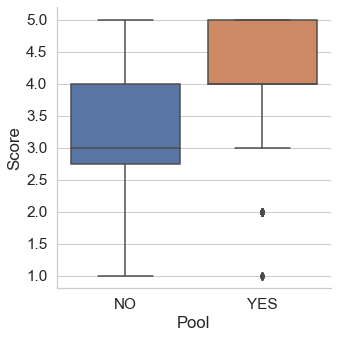

In [3]:
#setting font size and plot background
sns.set(font_scale=1.4)
sns.set_style("whitegrid")

sns.catplot(
    x="Pool",
    y="Score",
    data=reviews,
    kind="box"
);

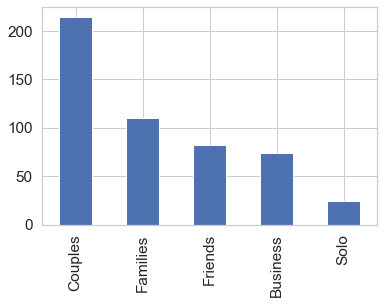

In [4]:
reviews["Traveler type"].value_counts().plot.bar();

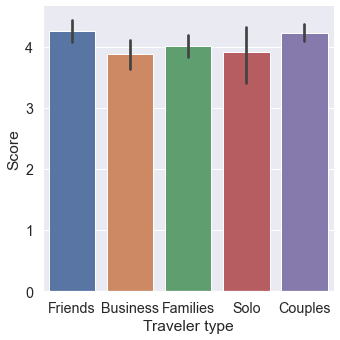

In [5]:
sns.set(font_scale=1.3)
sns.set_style("darkgrid")
sns.catplot(
    x="Traveler type",
    y="Score",
    data=reviews,
    kind="bar");

In [6]:
#ordering the categories
reviews["Traveler type"] = reviews["Traveler type"].astype('category')
reviews["Traveler type"].cat.categories

Index(['Business', 'Couples', 'Families', 'Friends', 'Solo'], dtype='object')

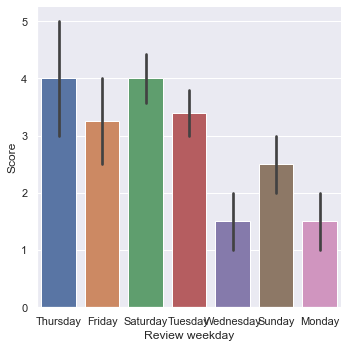

In [7]:
sns.set(font_scale=1.0)
sns.set_style("darkgrid")
sns.catplot(
    x="Review weekday",
    y="Score",
    data=reviews[reviews["Pool"]=="NO"],
    kind="bar");

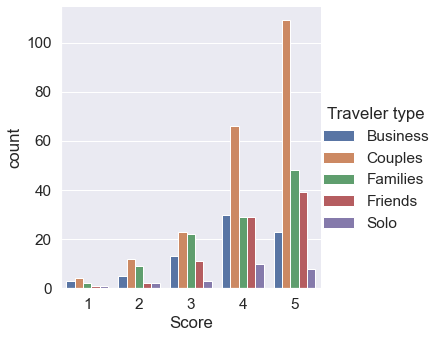

In [8]:
sns.set(font_scale=1.4)
sns.set_style("darkgrid")

# Create a catplot that will count the frequency of "Score" across "Traveler type"
sns.catplot(
  x="Score",hue="Traveler type", data=reviews,kind="count");

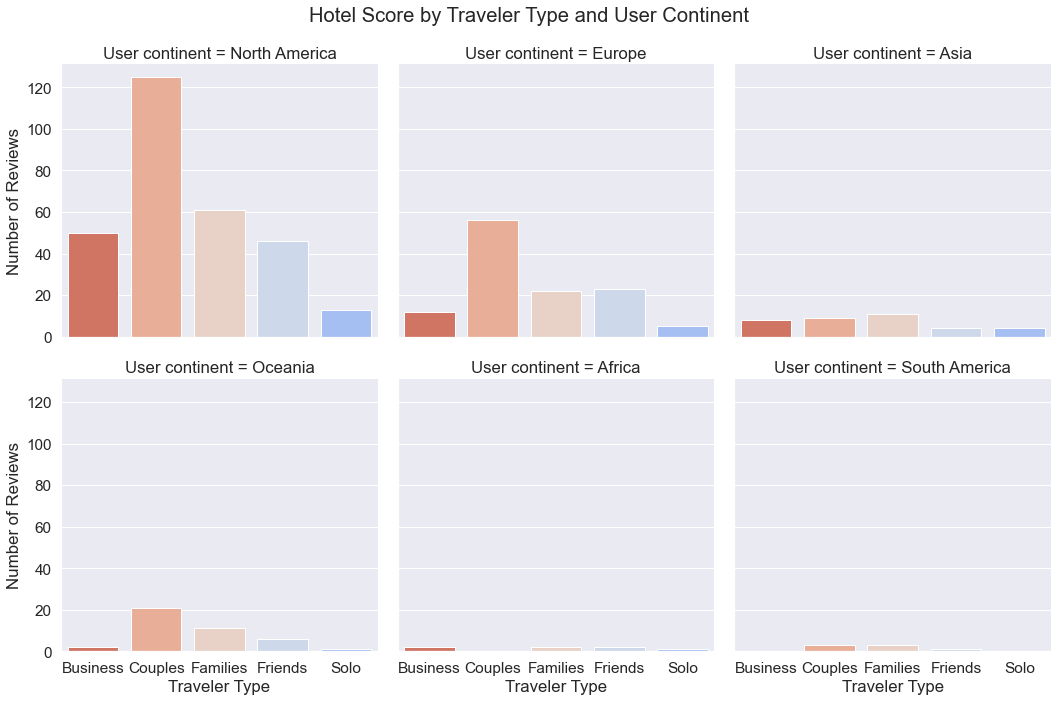

In [22]:
ax= sns.catplot(x="Traveler type",
            kind="count",
           col="User continent",
           col_wrap=3,
           palette=sns.color_palette("coolwarm_r"),
           data=reviews)
ax.fig.suptitle('Hotel Score by Traveler Type and User Continent')
ax.set_axis_labels("Traveler Type","Number of Reviews")
plt.subplots_adjust(top=0.90);

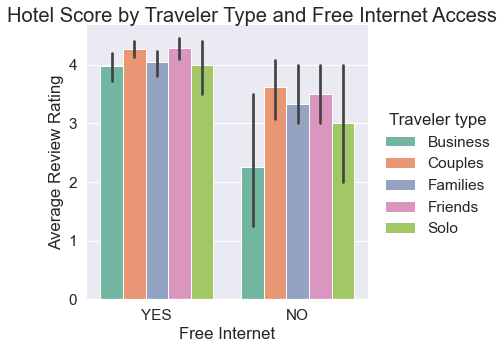

In [32]:
# Adjust the color
ax = sns.catplot(
  x="Free internet", y="Score",
  hue="Traveler type", kind="bar",
  data=reviews,
  palette=sns.color_palette("Set2")
)

# Add a title
ax.fig.suptitle("Hotel Score by Traveler Type and Free Internet Access")
# Update the axis labels
ax.set_axis_labels("Free Internet", "Average Review Rating")

# Adjust the starting height of the graphic
plt.subplots_adjust(top=.93)
plt.show()

In [43]:
cars_link="https://assets.datacamp.com/production/repositories/5809/datasets/54f8f9de847ceff1ae33dbde4ed13f5729a5f83f/cars.csv"
cars = pd.read_csv(cars_link)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38531 entries, 0 to 38530
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   manufacturer_name  38531 non-null  object 
 1   model_name         38531 non-null  object 
 2   transmission       38531 non-null  object 
 3   color              38531 non-null  object 
 4   odometer_value     38531 non-null  int64  
 5   year_produced      38531 non-null  int64  
 6   engine_fuel        38531 non-null  object 
 7   engine_has_gas     38531 non-null  bool   
 8   engine_type        38531 non-null  object 
 9   engine_capacity    38521 non-null  float64
 10  body_type          38531 non-null  object 
 11  has_warranty       38531 non-null  bool   
 12  state              38531 non-null  object 
 13  drivetrain         38531 non-null  object 
 14  price_usd          38531 non-null  float64
 15  is_exchangeable    38531 non-null  bool   
 16  location_region    385

In [35]:
cars['manufacturer_name'].describe()

count          38531
unique            55
top       Volkswagen
freq            4243
Name: manufacturer_name, dtype: object

In [36]:
print("As object: ", cars["manufacturer_name"].nbytes)
print("As category: ", cars["manufacturer_name"].astype('category').nbytes)

As object:  308248
As category:  38971


In [40]:
cars['color'] = cars["color"].astype("category")
cars['color'] = cars['color'].str.upper()
print(cars['color'].dtype)

object


In [41]:
cars.color

0        SILVER
1          BLUE
2           RED
3          BLUE
4         BLACK
          ...  
38526    SILVER
38527      BLUE
38528      BLUE
38529     BLACK
38530    SILVER
Name: color, Length: 38531, dtype: object

In [44]:
#look for missing values
cars['color'] = cars['color'].astype('category')
cars['color'].cat.set_categories(['black','silver','blue'],inplace=True)
cars['color'].value_counts(dropna=False)

NaN       18172
black      7705
silver     6852
blue       5802
Name: color, dtype: int64

In [47]:
#label encoding
cars['manufacturer_name'] = cars['manufacturer_name'].astype("category")
codes = cars['manufacturer_name'].cat.codes
categories = cars['manufacturer_name']
name_map = dict(zip(codes, categories))
print(name_map)

{45: 'Subaru', 24: 'LADA', 12: 'Dodge', 54: 'УАЗ', 23: 'Kia', 35: 'Opel', 53: 'Москвич', 1: 'Alfa Romeo', 0: 'Acura', 10: 'Dacia', 27: 'Lexus', 33: 'Mitsubishi', 25: 'Lancia', 9: 'Citroen', 32: 'Mini', 21: 'Jaguar', 38: 'Porsche', 44: 'SsangYong', 11: 'Daewoo', 15: 'Geely', 50: 'ВАЗ', 13: 'Fiat', 14: 'Ford', 39: 'Renault', 42: 'Seat', 40: 'Rover', 48: 'Volkswagen', 28: 'Lifan', 22: 'Jeep', 5: 'Cadillac', 2: 'Audi', 52: 'ЗАЗ', 47: 'Toyota', 51: 'ГАЗ', 49: 'Volvo', 7: 'Chevrolet', 16: 'Great Wall', 4: 'Buick', 37: 'Pontiac', 29: 'Lincoln', 18: 'Hyundai', 34: 'Nissan', 46: 'Suzuki', 3: 'BMW', 30: 'Mazda', 26: 'Land Rover', 20: 'Iveco', 43: 'Skoda', 41: 'Saab', 19: 'Infiniti', 6: 'Chery', 17: 'Honda', 31: 'Mercedes-Benz', 36: 'Peugeot', 8: 'Chrysler'}


In [50]:
cars['manufacturer_name']=cars['manufacturer_name'].cat.codes
cars['manufacturer_name'].head()

0    45
1    45
2    45
3    45
4    45
Name: manufacturer_name, dtype: int8

In [51]:
#revert to previous values
cars['manufacturer_name'].map(name_map)

0          Subaru
1          Subaru
2          Subaru
3          Subaru
4          Subaru
           ...   
38526    Chrysler
38527    Chrysler
38528    Chrysler
38529    Chrysler
38530    Chrysler
Name: manufacturer_name, Length: 38531, dtype: object

In [55]:
#boolean coding
import numpy as np
cars['van_code'] = np.where(
    cars['body_type'].str.contains("van", regex=False),"Van","Not a van")
cars['van_code'].value_counts()

Not a van    34115
Van           4416
Name: van_code, dtype: int64

In [56]:
cars[["odometer_value","color"]].head()

,odometer_value,color
0,190000,silver
1,290000,blue
2,402000,NaN
3,10000,blue
4,280000,black


In [57]:
#one hot encoding
cars_onehot = pd.get_dummies(cars[["odometer_value","color"]])
cars_onehot.head()

,odometer_value,color_black,color_silver,color_blue
0,190000,0,1,0
1,290000,0,0,1
2,402000,0,0,0
3,10000,0,0,1
4,280000,1,0,0


In [58]:
cars_onehot = pd.get_dummies(cars,columns=["color"], prefix="")
cars_onehot.head()

,manufacturer_name,model_name,transmission,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed,van_code,_black,_silver,_blue
0,45,Outback,automatic,190000,2010,gasoline,False,gasoline,2.5,universal,...,True,False,True,True,True,16,Not a van,0,1,0
1,45,Outback,automatic,290000,2002,gasoline,False,gasoline,3.0,universal,...,True,False,False,False,True,83,Not a van,0,0,1
2,45,Forester,automatic,402000,2001,gasoline,False,gasoline,2.5,suv,...,False,False,False,True,True,151,Not a van,0,0,0
3,45,Impreza,mechanical,10000,1999,gasoline,False,gasoline,3.0,sedan,...,False,False,False,False,False,86,Not a van,0,0,1
4,45,Legacy,automatic,280000,2001,gasoline,False,gasoline,2.5,universal,...,False,False,False,False,True,7,Not a van,1,0,0


In [68]:
from collections import Counter
Counter(reviews['Traveler type']).most_common(3)

[('Couples', 214), ('Families', 110), ('Friends', 82)]